# **TikTok - EDA and Data Visualization Project**

![](https://upload.wikimedia.org/wikipedia/en/thumb/a/a9/TikTok_logo.svg/500px-TikTok_logo.svg.png?20200415104610)

*this project is currently in progress, work done so far is outlined below, feel free to add any comments :)*

## Summary
This project aims to delve into a dataset from TikTok, focusing on distinguishing factors between claim and opinion videos. It consists of four key components:

**Part 1: Imports, Links, and Loading:** This phase involves importing necessary libraries, establishing links to relevant data sources, and loading the dataset for analysis.

**Part 2: Data Exploration:** Within this segment, the emphasis lies on comprehensively exploring the dataset. This encompasses data cleaning procedures aimed at enhancing data quality and integrity.

**Part 3: Build Visualizations:** In this stage, the primary objective is to construct professional-grade data visualizations. Visualizations were done both in python using the appropriate libraries or with Tableau (links to the visualizations are listed in the section).

**Part 4: Evaluate and Share Results:** The final phase involves evaluating the outcomes of the exploratory analysis. It is crucial to extract meaningful insights from the visualizations generated in the previous step. The ultimate goal is to present these findings in a manner conducive to informed decision-making for business purposes.

The overarching purpose of this project is to conduct a comprehensive exploration of the dataset, with a focus on discerning distinctions between claim and opinion videos. By performing thorough exploratory data analysis and crafting informative visualizations, the project endeavors to extract actionable insights beneficial for driving data-driven decisions in a professional context.

**Note**
This project was done as the final assignment of the [Go Beyond the Numbers: Translate Data into Insights](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight) course, which is a part of the [Google Advanced Data Analytics](https://www.coursera.org/professional-certificates/google-advanced-data-analytics) certification.

# **Visualize a story in Tableau and Python**

### Importing libraries and loading dataset

In [4]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset
df = pd.read_csv("tiktok_dataset.csv")

### Cleaning and initial data exploration

In [5]:
# Taking a look at the first 5 rows
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [6]:
# Data types for the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Basic statisical summary of the numerical columns in the dataset
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Finding out the number of missing values
null_values = df.isnull().sum()
print(null_values)

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


It seems like there are 298 rows with null values in them

In [9]:
# Finding out which rows in the dataframe have missing values
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

           # claim_status    video_id  video_duration_sec  \
19084  19085          NaN  4380513697                  39   
19085  19086          NaN  8352130892                  60   
19086  19087          NaN  4443076562                  25   
19087  19088          NaN  8328300333                   7   
19088  19089          NaN  3968729520                   8   
...      ...          ...         ...                 ...   
19377  19378          NaN  7578226840                  21   
19378  19379          NaN  6079236179                  53   
19379  19380          NaN  2565539685                  10   
19380  19381          NaN  2969178540                  24   
19381  19382          NaN  8132759688                  13   

      video_transcription_text verified_status author_ban_status  \
19084                      NaN    not verified            active   
19085                      NaN    not verified            active   
19086                      NaN    not verified            activ

In [10]:
# Removing the rows with missing values
df = df.dropna()

### Visualizing the data

Now that you have assessed your data, it’s time to plot your visualization(s).

#### Video Duration

Boxplot

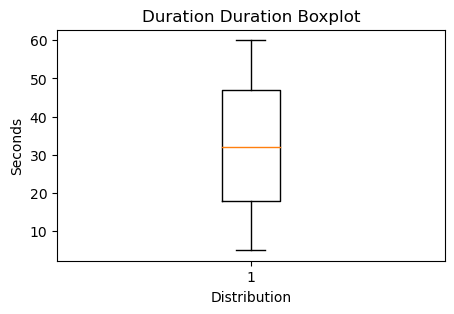

In [54]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_duration_sec'])
plt.xlabel('Distribution')
plt.ylabel('Seconds')
plt.title('Duration Duration Boxplot')
plt.show()

Histogram

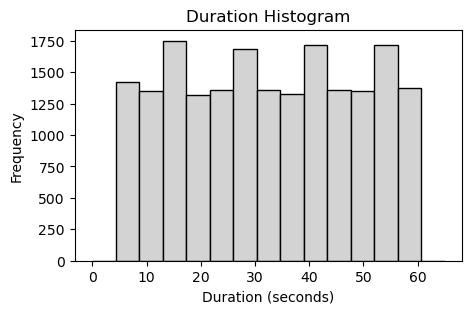

In [53]:
plt.figure(figsize=(5, 3))
plt.hist(df['video_duration_sec'], bins=15, range=[0,65], edgecolor='black', color='lightgrey')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Duration Histogram')
plt.show()

Tendency of videos to be around 30s in length, as well as 15, 45 and 60. 15second interval between each.

#### View Count

Boxplot

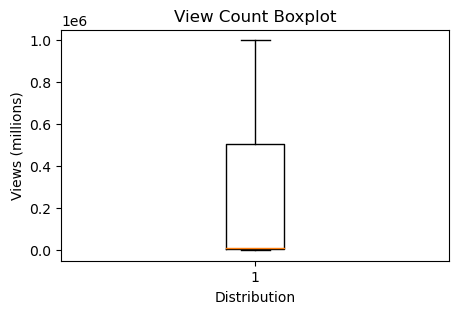

In [50]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_view_count'])
plt.xlabel('Distribution')
plt.ylabel('Views (millions)')
plt.title('View Count Boxplot')
plt.show()

Histogram

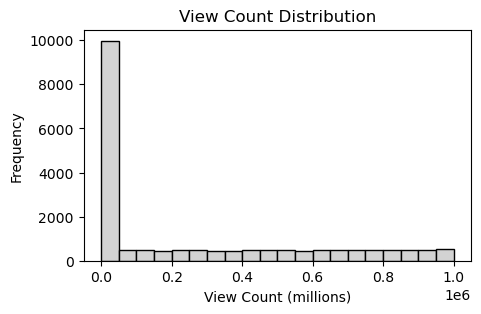

In [52]:
plt.figure(figsize=(5, 3))
plt.hist(df['video_view_count'], bins=20, range=[0,df['video_view_count'].max()], edgecolor='black', color='lightgrey')
plt.xlabel('View Count (millions)')
plt.ylabel('Frequency')
plt.title('View Count Distribution')
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### Like Count

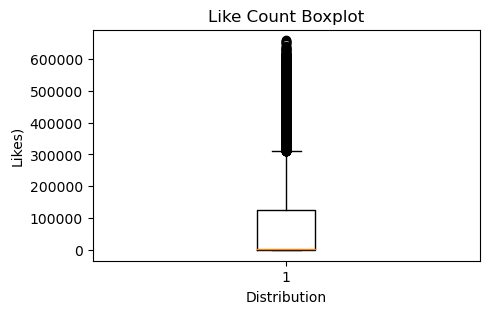

In [56]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_like_count'])
plt.xlabel('Distribution')
plt.ylabel('Likes)')
plt.title('Like Count Boxplot')
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

In [ ]:
# Create a histogram
### YOUR CODE HERE ###


**Question:** What do you notice about the distribution of this variable?

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

In [ ]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###



Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

In [ ]:
# Create a histogram
### YOUR CODE HERE ###


**Question:** What do you notice about the distribution of this variable?

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

In [ ]:
# Create a boxplot to visualize distribution of `video_share_count`
### YOUR CODE HERE ###


*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

In [ ]:
# Create a histogram
### YOUR CODE HERE ###


**Question:** What do you notice about the distribution of this variable?

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

In [ ]:
# Create a boxplot to visualize distribution of `video_download_count`
### YOUR CODE HERE ###


Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

In [ ]:
# Create a histogram
### YOUR CODE HERE ###


**Question:** What do you notice about the distribution of this variable?

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

In [ ]:
# Create a histogram
### YOUR CODE HERE ###


**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

In [ ]:
# Create a histogram
### YOUR CODE HERE ###


**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

In [ ]:
# Create a bar plot
### YOUR CODE HERE ###

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

In [ ]:
# Calculate the median view count for claim status.
### YOUR CODE HERE ###

In [ ]:
### YOUR CODE HERE ###

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

In [ ]:
# Create a pie graph
### YOUR CODE HERE ###


**Question:** What do you notice about the overall view count for claim status?

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [ ]:
### YOUR CODE HERE ###

#### **Scatterplot**

In [ ]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
### YOUR CODE HERE ###


In [ ]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
### YOUR CODE HERE ###



You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


==> ENTER YOUR RESPONSE HERE

I have learned ....

My other questions are ....

My client would likely want to know ...



### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

==> ENTER YOUR RESPONSES HERE

Visualizations helped me understand ..

==> ENTER YOUR RESPONSES HERE


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.